In [9]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple, Union

In [17]:
from typing import Dict, List

def parse_segment(segment: str) -> Dict[str, Dict[str, str]]:
    segment_dict = {'repeats': 1, 'interval': {}, 'recovery': {}}
    
    if 'x' in segment:
        repeats, segment = segment.split('x', 1)
        segment_dict['repeats'] = int(repeats)
    
    if 'r' in segment:
        interval_part, recovery_part = segment.split('r', 1)
    else:
        interval_part = segment
        recovery_part = None
    
    if '@' in interval_part:
        duration, intensity = interval_part.split('@')
        segment_dict['interval']['duration'] = int(duration[:-1])
        segment_dict['interval']['unit'] = 's' if 's' in duration else 'm'
        segment_dict['interval']['intensity'] = intensity

    if recovery_part and '@' in recovery_part:
        duration, intensity = recovery_part.split('@')
        segment_dict['recovery']['duration'] = int(duration[:-1])
        segment_dict['recovery']['unit'] = 's' if 's' in duration else 'm'
        segment_dict['recovery']['intensity'] = intensity

    return segment_dict

def parse_segments(segment_list: List[str]) -> List[Dict[str, Dict[str, str]]]:
    return [parse_segment(segment) for segment in segment_list]


In [18]:
# Example usage
segment = "8x30s@135r30s@72"
parse_segment(segment)

{'repeats': 8,
 'interval': {'duration': 30, 'unit': 's', 'intensity': '135'},
 'recovery': {'duration': 30, 'unit': 's', 'intensity': '72'}}

In [67]:
# Using the provided workout string as input to the parse_segments function
workout_str = "15m@60-70 8x30s@135r30s@72 8m@72 8x30s@135r30s@72 8m@72r10m@72-60"

# Since the input is a single string, we need to split it into a list of segments first
segment_list = workout_str.split()

# Parsing the segments
parse_segments(segment_list)

[{'repeats': 1,
  'interval': {'duration': 15, 'unit': 'm', 'intensity': '60-70'},
  'recovery': {}},
 {'repeats': 8,
  'interval': {'duration': 30, 'unit': 's', 'intensity': '135'},
  'recovery': {'duration': 30, 'unit': 's', 'intensity': '72'}},
 {'repeats': 1,
  'interval': {'duration': 8, 'unit': 'm', 'intensity': '72'},
  'recovery': {}},
 {'repeats': 8,
  'interval': {'duration': 30, 'unit': 's', 'intensity': '135'},
  'recovery': {'duration': 30, 'unit': 's', 'intensity': '72'}},
 {'repeats': 1,
  'interval': {'duration': 8, 'unit': 'm', 'intensity': '72'},
  'recovery': {'duration': 10, 'unit': 'm', 'intensity': '72-60'}}]

In [68]:
def parse_workout(workout_str: str):
    # Since the input is a single string, we need to split it into a list of segments first
    segment_list = workout_str.split()
    return {id: parse_segment(segment) for id, segment in enumerate(segment_list)}

In [69]:
# Using the provided workout string as input to the parse_segments function
workout_str = "15m@60-70 8x30s@135r30s@72 8m@72 8x30s@135r30s@72 8m@72r10m@72-60"
parse_workout(workout_str)

{0: {'repeats': 1,
  'interval': {'duration': 15, 'unit': 'm', 'intensity': '60-70'},
  'recovery': {}},
 1: {'repeats': 8,
  'interval': {'duration': 30, 'unit': 's', 'intensity': '135'},
  'recovery': {'duration': 30, 'unit': 's', 'intensity': '72'}},
 2: {'repeats': 1,
  'interval': {'duration': 8, 'unit': 'm', 'intensity': '72'},
  'recovery': {}},
 3: {'repeats': 8,
  'interval': {'duration': 30, 'unit': 's', 'intensity': '135'},
  'recovery': {'duration': 30, 'unit': 's', 'intensity': '72'}},
 4: {'repeats': 1,
  'interval': {'duration': 8, 'unit': 'm', 'intensity': '72'},
  'recovery': {'duration': 10, 'unit': 'm', 'intensity': '72-60'}}}

In [85]:
def convert_to_course_data(workout_str: str, time_unit: str = "m") -> List[Tuple[float, int]]:
    parsed_workout = parse_segments(workout_str.split())
    course_data: List[Tuple[float, int]] = []
    course_data.append((0, 50))
    current_time = 0  # Initialize time at second zero

    for segment in parsed_workout:
        repeats = segment['repeats']
        for _ in range(repeats):
            interval = segment['interval']
            intensity = int(interval['intensity'].split('-')[0])
            duration_seconds = calculate_duration_in_seconds(interval['duration'], interval['unit'])
            current_time += duration_seconds
            course_data.append((current_time, intensity))
            
            if 'recovery' in segment and segment['recovery']:
                recovery = segment['recovery']
                intensity = int(recovery['intensity'].split('-')[0])
                duration_seconds = calculate_duration_in_seconds(recovery['duration'], recovery['unit'])
                current_time += duration_seconds
                course_data.append((current_time, intensity))

    if time_unit == "m":
        course_data = convert_time_to_minute(course_data)

    return course_data


def calculate_duration_in_seconds(duration: int, unit: str = "s") -> Tuple[int, int]:
    if unit == 'm':
        return duration * 60
    return duration 


def convert_time_to_minute(course_data: List[Tuple[float, int]]) -> List[Tuple[float, int]]:
    return [(seconds_to_minutes(t), intensity) for t, intensity in course_data] 


def seconds_to_minutes(seconds:int) -> int:
    min, sec = divmod(seconds, 60)
    return f"{min}.{sec}"



In [86]:
workout_str = "15m@60-70 8x30s@135r30s@72 8m@72 8x30s@135r30s@72 8m@72r10m@72-60"
course_data = convert_to_course_data(workout_str, "s")


In [87]:
course_data

[(0, 50),
 (900, 60),
 (930, 135),
 (960, 72),
 (990, 135),
 (1020, 72),
 (1050, 135),
 (1080, 72),
 (1110, 135),
 (1140, 72),
 (1170, 135),
 (1200, 72),
 (1230, 135),
 (1260, 72),
 (1290, 135),
 (1320, 72),
 (1350, 135),
 (1380, 72),
 (1860, 72),
 (1890, 135),
 (1920, 72),
 (1950, 135),
 (1980, 72),
 (2010, 135),
 (2040, 72),
 (2070, 135),
 (2100, 72),
 (2130, 135),
 (2160, 72),
 (2190, 135),
 (2220, 72),
 (2250, 135),
 (2280, 72),
 (2310, 135),
 (2340, 72),
 (2820, 72),
 (3420, 72)]

In [ ]:
def generate_workout_file(workout_str, description="Workout", file_name="workout.mrc"):
    course_data = convert_to_course_data(workout_str)
    
    header = f"""[COURSE HEADER]
VERSION = 2
UNITS = METRIC
DESCRIPTION = {description}
FILE NAME = {file_name}
MINUTES PERCENT
[END COURSE HEADER]"""

    course_data_str = "\n".join([f"{time:.2f}\t{intensity}" for time, intensity in course_data])
    
    final_content = f"{header}\n[COURSE DATA]\n{course_data_str}\n[END COURSE DATA]"
    return final_content

In [ ]:
# Testing the corrected function
workout_str = "15m@60-70 3x8x30s@135r30s@72 8m@72 8x30s@135r30s@72 8m@72r10m@72-60"
description = "VO2max Microbursts - beginners"
file_name = "vo2max_microbursts_beginners.mrc"

# Execute the function and print a portion of the result for brevity
converted_workout_corrected = qwkcode_to_internal(workout_str, description, file_name)
print("\n".join(converted_workout_corrected.split("\n")[:20]))  # Print the first 20 lines for brevity

In [ ]:
# Example usage
workout_str = "15m@60-70 3x8x30s@135r30s@72 8m@72 8x30s@135r30s@72 8m@72r10m@72-60"
description = "VO2max Microbursts - beginners"
file_name = "vo2max_microbursts_beginners.mrc"
qwkcode_to_internal(workout_str, description, file_name)

# Plotting


In [93]:
def plot_workout(workout_str):
    data = convert_to_course_data(workout_str, "s")
    x_values = [item[0] / 60 for item in data]
    y_values = [item[1] for item in data]

    # Plot the data
    plt.plot(x_values, y_values)

    # Add labels and title
    plt.xlabel('Time (minutes)')
    plt.ylabel("% FTP")
    plt.title('Workout')

    # Display the plot
    plt.show()


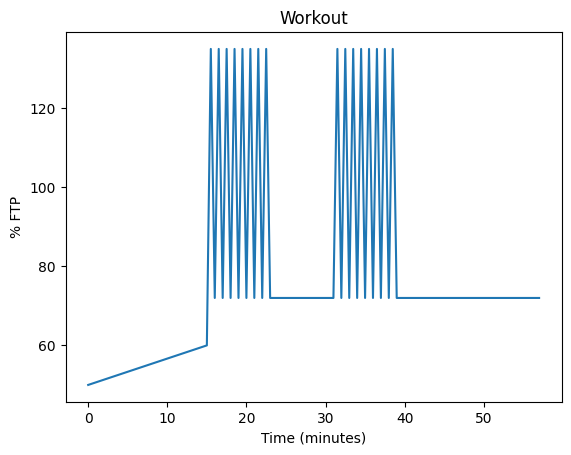

In [94]:
workout_str = "15m@60-70 8x30s@135r30s@72 8m@72 8x30s@135r30s@72 8m@72r10m@72-60"
plot_workout(workout_str)

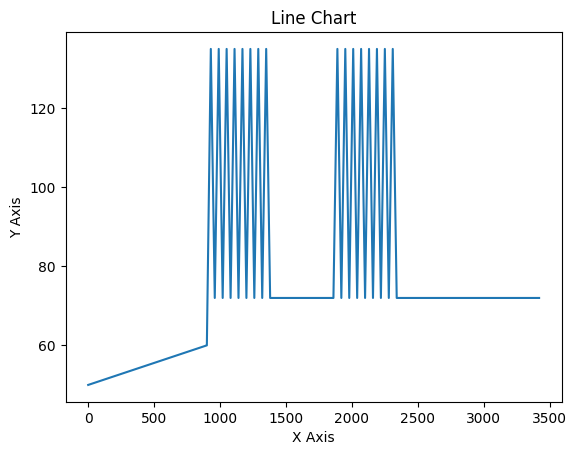

In [84]:
# Separate the x and y values



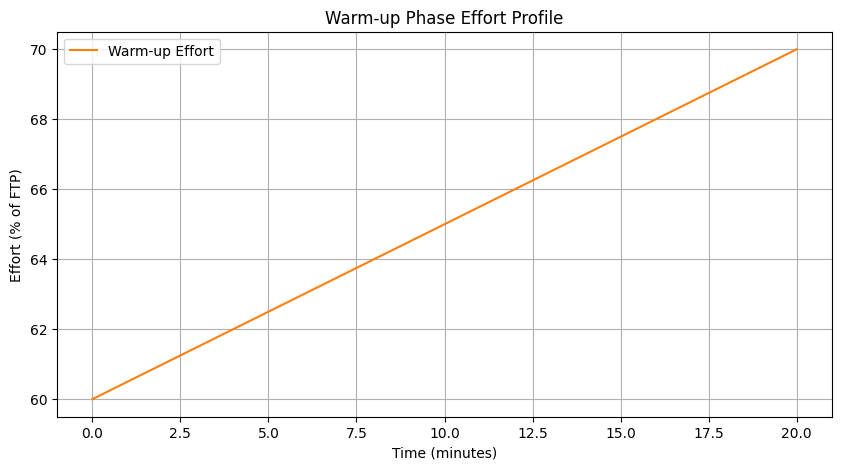

In [96]:
# Correcting the function to accurately concatenate the warm-up and main set, ensuring warm-up is shown as 20 minutes

# Re-defining warm-up with accurate timing
warm_up_duration = 20  # minutes
warm_up_start_ftp = 60  # % of FTP
warm_up_end_ftp = 70  # % of FTP
warm_up_time = np.linspace(0, warm_up_duration, warm_up_duration * 60)  # 1 point per second over minutes, correctly calculated
warm_up_effort = np.linspace(warm_up_start_ftp, warm_up_end_ftp, warm_up_duration * 60)

# Plotting the warm-up portion
plt.figure(figsize=(10, 5))
plt.plot(warm_up_time, warm_up_effort, label="Warm-up Effort", color='tab:orange')
plt.title("Warm-up Phase Effort Profile")
plt.xlabel("Time (minutes)")
plt.ylabel("Effort (% of FTP)")
plt.legend()
plt.grid(True)
plt.show()

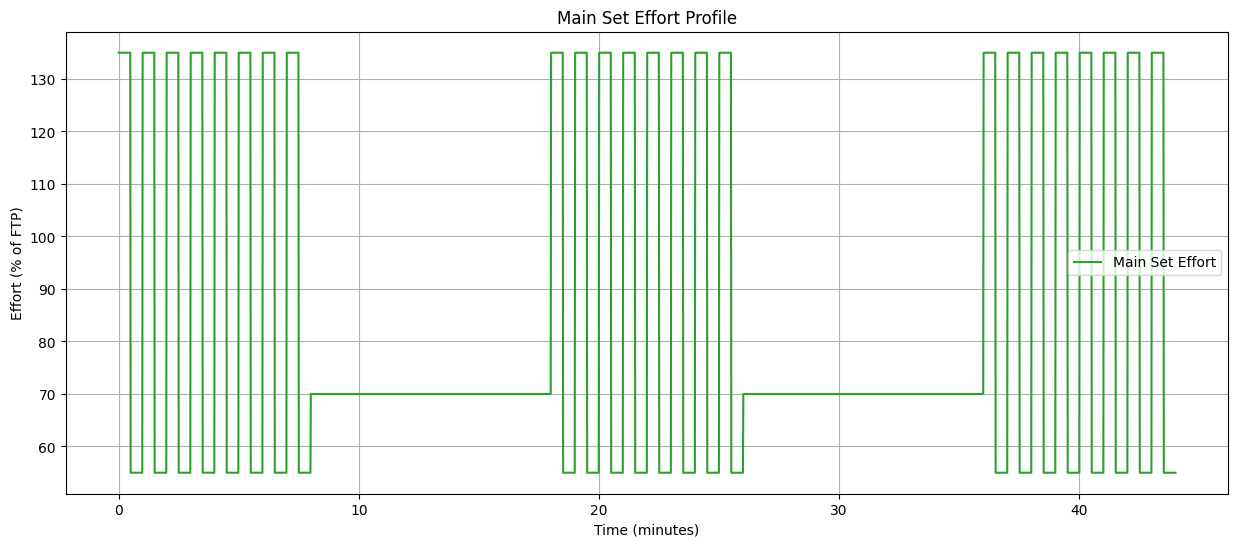

In [97]:



# Main set details
main_set_intervals_per_set = 8
main_set_sets = 3
main_set_on_duration = 30  # seconds
main_set_off_duration = 30  # seconds
main_set_on_ftp = 135  # % of FTP
main_set_off_ftp = 55  # % of FTP
main_set_rest_duration = 10 * 60  # seconds, between sets

# Creating the main set effort pattern (for one set)
one_set = np.array([([main_set_on_ftp] * main_set_on_duration + [main_set_off_ftp] * main_set_off_duration)
                    for _ in range(main_set_intervals_per_set)]).flatten()
# Repeat for the number of sets, with rest in between
main_set_effort = np.array([])
for _ in range(main_set_sets):
    if len(main_set_effort) > 0:  # add rest if not the first iteration
        main_set_effort = np.append(main_set_effort, [warm_up_end_ftp] * main_set_rest_duration)
    main_set_effort = np.append(main_set_effort, one_set)

# # Time array for the main set, assuming immediate start after warm-up for plotting purposes
main_set_time = np.linspace(0, len(main_set_effort) / 60, len(main_set_effort))  # Convert to minutes for plotting

# Calculating main set start and end times after warm-up
main_set_start_time = warm_up_time[-1] + 1  # seconds
main_set_end_time = main_set_start_time + len(main_set_effort)  # seconds


# Plotting the main set portion
plt.figure(figsize=(15, 6))
plt.plot(main_set_time, main_set_effort, label="Main Set Effort", color='tab:green')
plt.title("Main Set Effort Profile")
plt.xlabel("Time (minutes)")
plt.ylabel("Effort (% of FTP)")
plt.legend()
plt.grid(True)
plt.show()

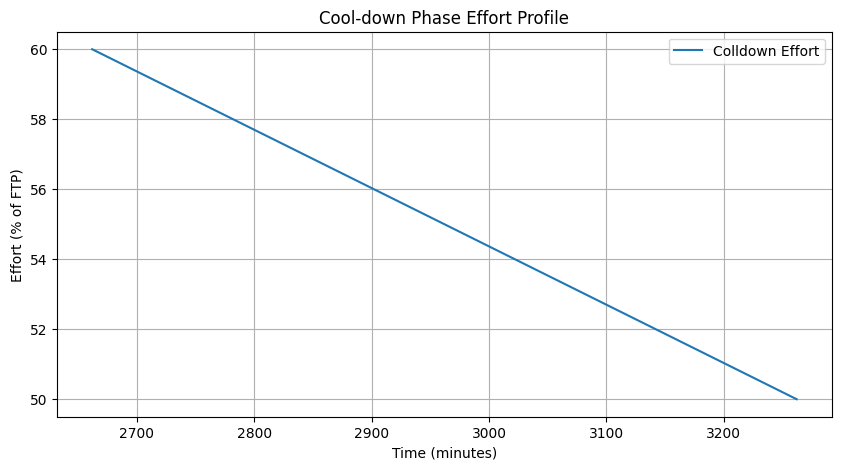

In [98]:
# main_set_start_time = warm_up_time[-1] + 1

# Cool down (10 minutes, starting from 60% and reducing to 50% FTP)
cool_down_duration = 10  # minutes
cool_down_start_ftp = 60  # Start at 60% FTP for cool down
cool_down_end_ftp = 50  # End at 50% FTP for cool down
cool_down_start_time = main_set_end_time + 1  # Start after the main set ends
cool_down_time = np.linspace(cool_down_start_time, cool_down_start_time + cool_down_duration * 60, cool_down_duration * 60)
cool_down_effort = np.linspace(cool_down_start_ftp, cool_down_end_ftp, cool_down_duration * 60)


# Plotting the cool-down portion
plt.figure(figsize=(10, 5))
plt.plot(cool_down_time, cool_down_effort, label="Colldown Effort", color='tab:blue')
plt.title("Cool-down Phase Effort Profile")
plt.xlabel("Time (minutes)")
plt.ylabel("Effort (% of FTP)")
plt.legend()
plt.grid(True)
plt.show()


In [100]:
# Using the provided workout string as input to the parse_segments function
workout_str = "15m@60-70 8x30s@135r30s@72 8m@72 8x30s@135r30s@72 8m@72r10m@72-60"
parse_workout(workout_str)

{0: {'repeats': 1,
  'interval': {'duration': 15, 'unit': 'm', 'intensity': '60-70'},
  'recovery': {}},
 1: {'repeats': 8,
  'interval': {'duration': 30, 'unit': 's', 'intensity': '135'},
  'recovery': {'duration': 30, 'unit': 's', 'intensity': '72'}},
 2: {'repeats': 1,
  'interval': {'duration': 8, 'unit': 'm', 'intensity': '72'},
  'recovery': {}},
 3: {'repeats': 8,
  'interval': {'duration': 30, 'unit': 's', 'intensity': '135'},
  'recovery': {'duration': 30, 'unit': 's', 'intensity': '72'}},
 4: {'repeats': 1,
  'interval': {'duration': 8, 'unit': 'm', 'intensity': '72'},
  'recovery': {'duration': 10, 'unit': 'm', 'intensity': '72-60'}}}

In [99]:
# Correcting the function to accurately concatenate the warm-up and main set, ensuring warm-up is shown as 20 minutes

# # Re-defining warm-up with accurate timing
# warm_up_duration = 20  # minutes
# warm_up_start_ftp = 60  # % of FTP
# warm_up_end_ftp = 70  # % of FTP
# warm_up_time = np.linspace(0, warm_up_duration, warm_up_duration * 60)  # 1 point per second over minutes, correctly calculated
# warm_up_effort = np.linspace(warm_up_start_ftp, warm_up_end_ftp, warm_up_duration * 60)


# # Main set configuration (previously defined)
# # Adding to the warm-up time to correctly position the main set in time
main_set_start_time_corrected = warm_up_duration * 60  # seconds after the warm-up
main_set_time_corrected = np.arange(main_set_start_time_corrected, main_set_start_time_corrected + len(main_set_effort)) / 60  # Convert to minutes


# cool_down_time_corrected = cool_down_start_time * 60
# cool_down_time_corrected = np.arange(cool_down_time_corrected, cool_down_time_corrected + len(cool_down_effort)) / 60  # Convert to minutes

# # Combining warm-up and main set for a continuous workout profile
# total_time_corrected = np.concatenate((warm_up_time, main_set_time_corrected, cool_down_time_corrected))
# total_effort_corrected = np.concatenate((warm_up_effort, main_set_effort, cool_down_effort))


# Combining warm-up and main set for a continuous workout profile
total_time_corrected = np.concatenate((warm_up_time, main_set_time_corrected, cool_down_start_time))
total_effort_corrected = np.concatenate((warm_up_effort, main_set_effort, cool_down_effort))

# Plotting the corrected, continuous workout profile
plt.figure(figsize=(15, 6))
plt.plot(total_time_corrected, total_effort_corrected, label="Workout Effort", color='tab:blue')
plt.title("Corrected Continuous Workout Effort Profile")
plt.xlabel("Time (minutes)")
plt.ylabel("Effort (% of FTP)")
plt.legend()
plt.grid(True)
plt.show(), total_time_corrected[-1]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 2 has 0 dimension(s)

In [ ]:
# Correcting the function to accurately concatenate the warm-up and main set, ensuring warm-up is shown as 20 minutes

# Re-defining warm-up with accurate timing
warm_up_duration = 20  # minutes
warm_up_start_ftp = 60  # % of FTP
warm_up_end_ftp = 70  # % of FTP
warm_up_time = np.linspace(0, warm_up_duration, warm_up_duration * 60)  # 1 point per second over minutes, correctly calculated
warm_up_effort = np.linspace(warm_up_start_ftp, warm_up_end_ftp, warm_up_duration * 60)

# Main set configuration (previously defined)
# Adding to the warm-up time to correctly position the main set in time
main_set_start_time_corrected = warm_up_duration * 60  # seconds after the warm-up
main_set_time_corrected = np.arange(main_set_start_time_corrected, main_set_start_time_corrected + len(main_set_effort)) / 60  # Convert to minutes

# Combining warm-up and main set for a continuous workout profile
total_time_corrected = np.concatenate((warm_up_time, main_set_time_corrected))
total_effort_corrected = np.concatenate((warm_up_effort, main_set_effort))

# Plotting the corrected, continuous workout profile
plt.figure(figsize=(15, 6))
plt.plot(total_time_corrected, total_effort_corrected, label="Workout Effort", color='tab:blue')
plt.title("Corrected Continuous Workout Effort Profile")
plt.xlabel("Time (minutes)")
plt.ylabel("Effort (% of FTP)")
plt.legend()
plt.grid(True)
plt.show(), total_time_corrected[-1]


ValueError: x and y must have same first dimension, but have shapes (9,) and (3690,)

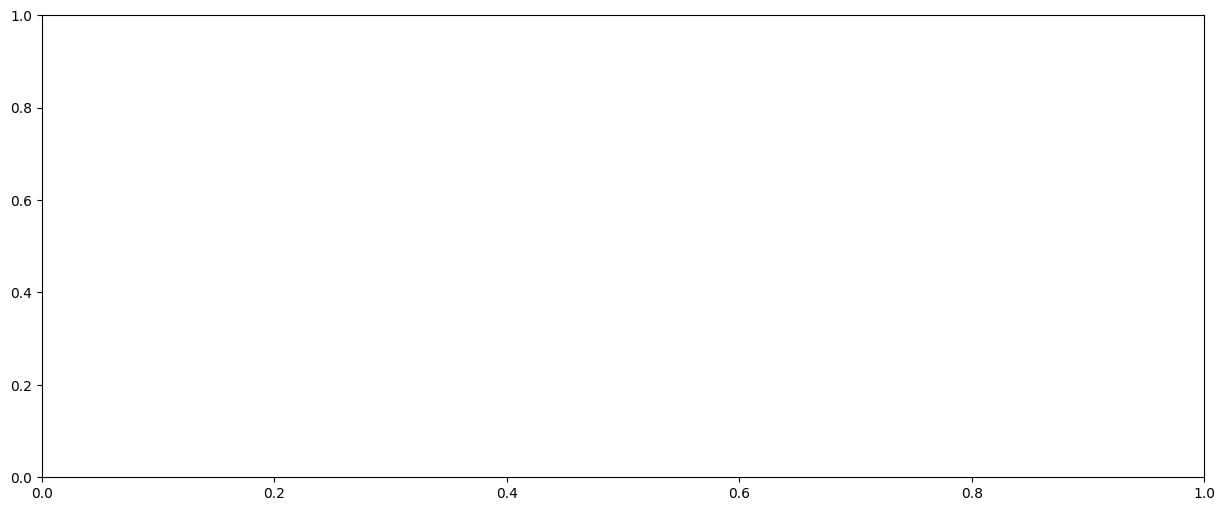

In [95]:

# Creating a function that can interpret UG_qwkcode_syntax and plot any given workout involves parsing the workout syntax to extract interval details, durations, intensities, and repeats. Then, it would dynamically generate the workout profile based on the parsed data. This function would need to handle various aspects of the UG_qwkcode_syntax, including repeats, intensity changes, and recoveries.
# Here's a simplified version of such a function. This example assumes a basic understanding of the syntax and focuses on key elements like repeats (`Nx`), durations (`tttm` or `ttts` for minutes and seconds), intensities (`@iii` for absolute watts or `%iii` for percentage of FTP), and recoveries (`r`). It will plot the workout based on percentages of FTP, ignoring lap markers for simplicity. 
# Keep in mind, this function can be extended to cover more complex aspects of the UG_qwkcode_syntax as needed.


import numpy as np
import matplotlib.pyplot as plt
import re

def plot_workout_from_syntax(workout_syntax):
    # Initial time and effort lists
    time = [0]  # start at 0 minutes
    effort = []
    
    # Split the workout into sections
    sections = workout_syntax.split()
    for section in sections:
        # Handle repeats
        repeat_match = re.match(r'(\d+)x', section)
        repeats = 1
        if repeat_match:
            repeats = int(repeat_match.group(1))
            section = section[repeat_match.end():]  # remove the repeat prefix for further processing
        
        # Split section into parts (work/recovery)
        parts = re.split(r'r', section)
        for _ in range(repeats):
            for part in parts:
                # Extract duration and intensity
                duration_match = re.match(r'(\d+)(m|s)', part)
                intensity_match = re.search(r'@(\d+)', part)
                if not duration_match or not intensity_match:
                    continue  # skip if either duration or intensity is missing
                
                duration = int(duration_match.group(1))
                if duration_match.group(2) == 's':  # convert seconds to minutes
                    duration = duration / 60
                intensity = int(intensity_match.group(1))
                
                # Append effort and calculate new time
                effort.extend([intensity] * int(duration * 60))  # assuming 1 value per second for plotting
                time.append(time[-1] + duration)
    
    # Convert effort to a more manageable scale if needed (e.g., percentage of FTP)
    # Here, it's assumed intensity is already given as a percentage of FTP
    
    # Plotting
    plt.figure(figsize=(15, 6))
    plt.plot(np.cumsum(time)/60, effort, label="Workout Effort", color='tab:blue')  # cumsum to accumulate time correctly
    plt.title("Generic Workout Effort Profile")
    plt.xlabel("Time (minutes)")
    plt.ylabel("Effort (% of FTP)")
    plt.grid(True)
    plt.show()

# Example usage
workout_syntax = "20m@60-70 3x8x30s@130-140r30s@50-60r10m@60 10m@50-60"
plot_workout_from_syntax(workout_syntax)